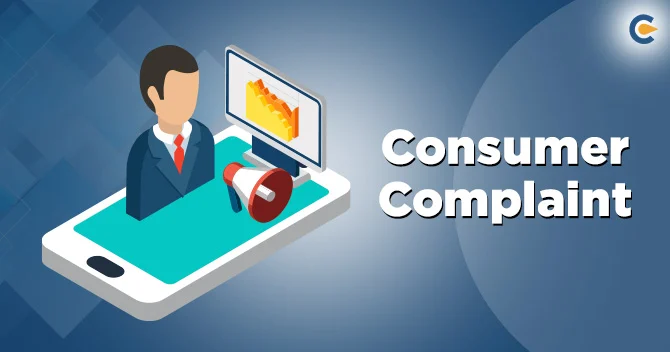

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [5]:
data=pd.read_csv("/datatset_consumer_complaints.csv")

In [4]:
df

,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Resolution time(in days),Year,QTR (US FLY)
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",NaN,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,0,2015,Q4
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NaN,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,0,2014,Q1
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",NaN,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,0,2014,Q4
3,1303679,"Continental Finance Company, LLC",Credit card,Billing statement,NaN,Web,03/26/2015,03/26/2015,Yes,No,Washington,3/26/2015,3/26/2015,0,2015,Q1
4,1627370,Experian,Credit reporting,Unable to get credit report/credit score,NaN,Web,10/27/2015,10/27/2015,Yes,No,Virginia,10/27/2015,10/27/2015,0,2015,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1778257,"Financial Credit Service, Inc.",Debt collection,"Loan modification,collection,foreclosure",NaN,Web,8/2/2016,8/2/2016,Yes,Yes,Texas,2/8/2016,2/8/2016,0,2016,Q1
13996,564605,Experian,Credit reporting,Unable to get credit report/credit score,NaN,Web,10/21/2013,10/21/2013,Yes,No,Washington,10/21/2013,10/21/2013,0,2013,Q4
13997,527989,BB&T Financial,Bank account or service,Deposits and withdrawals,NaN,Web,09/13/2013,09/17/2013,Yes,No,New Jersey,9/13/2013,9/17/2013,4,2013,Q3
13998,1883814,Synchrony Financial,Credit card,Payoff process,NaN,Email,04/18/2016,5/5/2016,Yes,No,Ohio,4/18/2016,5/5/2016,17,2016,Q2


In [7]:
df=pd.DataFrame(data)

In [8]:
df.head(6)

,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Resolution time(in days),Year,QTR (US FLY)
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",FL,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,0,2015,Q4
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NC,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,0,2014,Q1
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",MO,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,0,2014,Q4
3,1303679,"Continental Finance Company, LLC",Credit card,Billing statement,WA,Web,03/26/2015,03/26/2015,Yes,No,Washington,3/26/2015,3/26/2015,0,2015,Q1
4,1627370,Experian,Credit reporting,Unable to get credit report/credit score,VA,Web,10/27/2015,10/27/2015,Yes,No,Virginia,10/27/2015,10/27/2015,0,2015,Q4
5,1390231,Encore Capital Group,Debt collection,False statements or representation,IL,Web,05/23/2015,05/23/2015,Yes,No,Illinois,5/23/2015,5/23/2015,0,2015,Q2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0    ID                       14000 non-null  int64 
 1   Company                   14000 non-null  object
 2   Product                   14000 non-null  object
 3   Issue                     14000 non-null  object
 4   State                     13890 non-null  object
 5   Submitted via             14000 non-null  object
 6   Date received             14000 non-null  object
 7   Date resolved             14000 non-null  object
 8   Timely response?          14000 non-null  object
 9   Consumer disputed?        14000 non-null  object
 10  state name                13843 non-null  object
 11  Date received.1           14000 non-null  object
 12  Date resolved.1           14000 non-null  object
 13  Resolution time(in days)  14000 non-null  int64 
 14  Year                  

In [10]:
df.shape

(14000, 16)

In [11]:
df.columns

Index([' ID', 'Company', 'Product', 'Issue', 'State', 'Submitted via',
       'Date received', 'Date resolved', 'Timely response?',
       'Consumer disputed?', 'state name', 'Date received.1',
       'Date resolved.1', 'Resolution time(in days)', 'Year', 'QTR (US FLY)'],
      dtype='object')

In [12]:
df.describe()

,ID,Resolution time(in days),Year
count,1.400000e+04,14000.000000,14000.000000
mean,1.266522e+06,2.006000,2014.656571
std,5.396102e+05,6.373058,1.051118
min,2.162990e+05,-1.000000,2013.000000
25%,8.052365e+05,0.000000,2014.000000
50%,1.310814e+06,0.000000,2015.000000
75%,1.744076e+06,2.000000,2016.000000
max,2.207193e+06,286.000000,2016.000000


In [13]:
df.isnull().sum()

,0
ID,0
Company,0
Product,0
Issue,0
State,110
Submitted via,0
Date received,0
Date resolved,0
Timely response?,0
Consumer disputed?,0


In [14]:
df.dropna()

,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Resolution time(in days),Year,QTR (US FLY)
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",FL,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,0,2015,Q4
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NC,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,0,2014,Q1
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",MO,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,0,2014,Q4
3,1303679,"Continental Finance Company, LLC",Credit card,Billing statement,WA,Web,03/26/2015,03/26/2015,Yes,No,Washington,3/26/2015,3/26/2015,0,2015,Q1
4,1627370,Experian,Credit reporting,Unable to get credit report/credit score,VA,Web,10/27/2015,10/27/2015,Yes,No,Virginia,10/27/2015,10/27/2015,0,2015,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1778257,"Financial Credit Service, Inc.",Debt collection,"Loan modification,collection,foreclosure",TX,Web,8/2/2016,8/2/2016,Yes,Yes,Texas,2/8/2016,2/8/2016,0,2016,Q1
13996,564605,Experian,Credit reporting,Unable to get credit report/credit score,WA,Web,10/21/2013,10/21/2013,Yes,No,Washington,10/21/2013,10/21/2013,0,2013,Q4
13997,527989,BB&T Financial,Bank account or service,Deposits and withdrawals,NJ,Web,09/13/2013,09/17/2013,Yes,No,New Jersey,9/13/2013,9/17/2013,4,2013,Q3
13998,1883814,Synchrony Financial,Credit card,Payoff process,OH,Email,04/18/2016,5/5/2016,Yes,No,Ohio,4/18/2016,5/5/2016,17,2016,Q2


In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13995,False
13996,False
13997,False
13998,False


In [16]:
df.duplicated().sum()

np.int64(0)

# ENCODER

In [17]:
x=df.drop(columns=['QTR (US FLY)'])
x



,ID,Company,Product,Issue,State,Submitted via,Date received,Date resolved,Timely response?,Consumer disputed?,state name,Date received.1,Date resolved.1,Resolution time(in days),Year
0,1615767,PHH Mortgage,Mortgage,"Loan servicing, payments, escrow account",FL,Web,10/20/2015,10/20/2015,Yes,No,Florida,10/20/2015,10/20/2015,0,2015
1,654223,Ocwen,Mortgage,"Loan servicing, payments, escrow account",NC,Web,3/1/2014,3/1/2014,Yes,No,North Carolina,1/3/2014,1/3/2014,0,2014
2,1143398,"Southwest Credit Systems, L.P.",Debt collection,"Loan modification,collection,foreclosure",MO,Web,4/12/2014,4/12/2014,Yes,No,Missouri,12/4/2014,12/4/2014,0,2014
3,1303679,"Continental Finance Company, LLC",Credit card,Billing statement,WA,Web,03/26/2015,03/26/2015,Yes,No,Washington,3/26/2015,3/26/2015,0,2015
4,1627370,Experian,Credit reporting,Unable to get credit report/credit score,VA,Web,10/27/2015,10/27/2015,Yes,No,Virginia,10/27/2015,10/27/2015,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1778257,"Financial Credit Service, Inc.",Debt collection,"Loan modification,collection,foreclosure",TX,Web,8/2/2016,8/2/2016,Yes,Yes,Texas,2/8/2016,2/8/2016,0,2016
13996,564605,Experian,Credit reporting,Unable to get credit report/credit score,WA,Web,10/21/2013,10/21/2013,Yes,No,Washington,10/21/2013,10/21/2013,0,2013
13997,527989,BB&T Financial,Bank account or service,Deposits and withdrawals,NJ,Web,09/13/2013,09/17/2013,Yes,No,New Jersey,9/13/2013,9/17/2013,4,2013
13998,1883814,Synchrony Financial,Credit card,Payoff process,OH,Email,04/18/2016,5/5/2016,Yes,No,Ohio,4/18/2016,5/5/2016,17,2016


In [18]:
y=df['QTR (US FLY)']
y


,QTR (US FLY)
0,Q4
1,Q1
2,Q4
3,Q1
4,Q4
...,...
13995,Q1
13996,Q4
13997,Q3
13998,Q2


In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()




In [20]:
y=le.fit_transform(y)
y

array([3, 0, 3, ..., 2, 1, 1])

In [21]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse_output=False)
categorical_column = df.select_dtypes(exclude=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded_data = encoder.fit_transform(df.drop(columns=categorical_column))
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=encoder.get_feature_names_out(df.drop(columns=categorical_column).columns))  # Updated feature names
df.sklearn_encoder = pd.concat([df, one_hot_encoded_df], axis=1)
print(f"One_HotEncoder Data using sklearn:\n{df.sklearn_encoder}\n")

One_HotEncoder Data using sklearn:
            ID                                 Company  \
0      1615767                            PHH Mortgage   
1       654223                                   Ocwen   
2      1143398          Southwest Credit Systems, L.P.   
3      1303679        Continental Finance Company, LLC   
4      1627370                                Experian   
...        ...                                     ...   
13995  1778257          Financial Credit Service, Inc.   
13996   564605                                Experian   
13997   527989                          BB&T Financial   
13998  1883814                     Synchrony Financial   
13999  1893702  TransUnion Intermediate Holdings, Inc.   

                       Product                                     Issue  \
0                     Mortgage  Loan servicing, payments, escrow account   
1                     Mortgage  Loan servicing, payments, escrow account   
2              Debt collection  Loan mod

<ipython-input-21-fce1ee3562c1>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sklearn_encoder = pd.concat([df, one_hot_encoded_df], axis=1)


# BOXPLOT OUTLIER

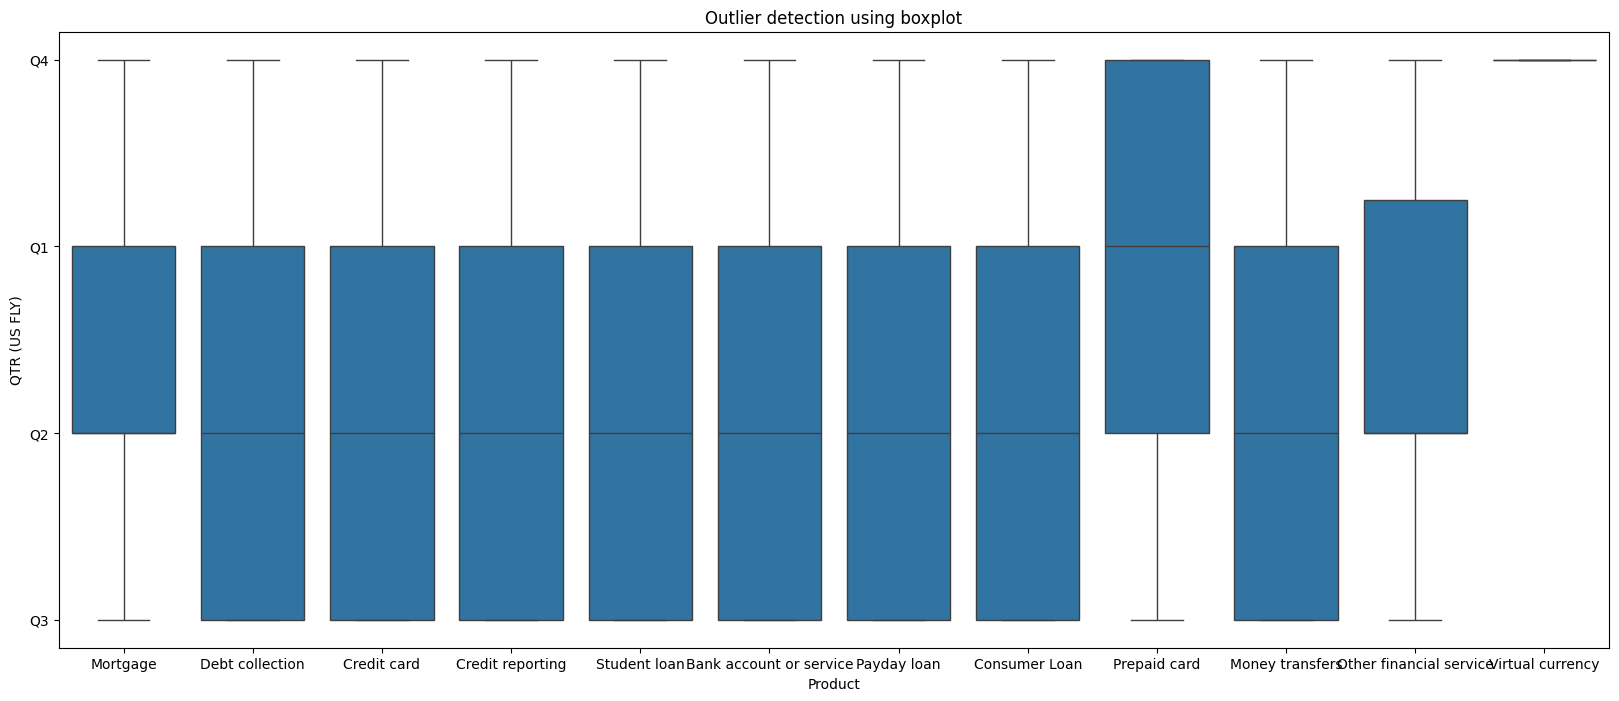

In [22]:
figure=plt.figure(figsize=(20,8))
sns.boxplot(x='Product',y='QTR (US FLY)',data=df)
plt.title("Outlier detection using boxplot")
plt.show()

In [23]:
def handling_outliers(df):
    numerical_features = df.select_dtypes(include=['number']).columns
    numerical_features = numerical_features.drop('Product', errors='ignore')
    for col in numerical_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)
        df = df[(df[col] >= Lower_bound) & (df[col] <= Upper_bound)]
    return df
df = handling_outliers(df.copy())

In [24]:
df.shape

(12865, 16)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
y=-df['Year']

In [27]:
x=df.drop('Year',axis=1)

In [28]:
x.columns

Index([' ID', 'Company', 'Product', 'Issue', 'State', 'Submitted via',
       'Date received', 'Date resolved', 'Timely response?',
       'Consumer disputed?', 'state name', 'Date received.1',
       'Date resolved.1', 'Resolution time(in days)', 'QTR (US FLY)'],
      dtype='object')

In [29]:
le=LabelEncoder()

In [30]:
y=le.fit_transform(y)

In [31]:
y

array([1, 2, 2, ..., 3, 3, 0])

# BOXPLOT

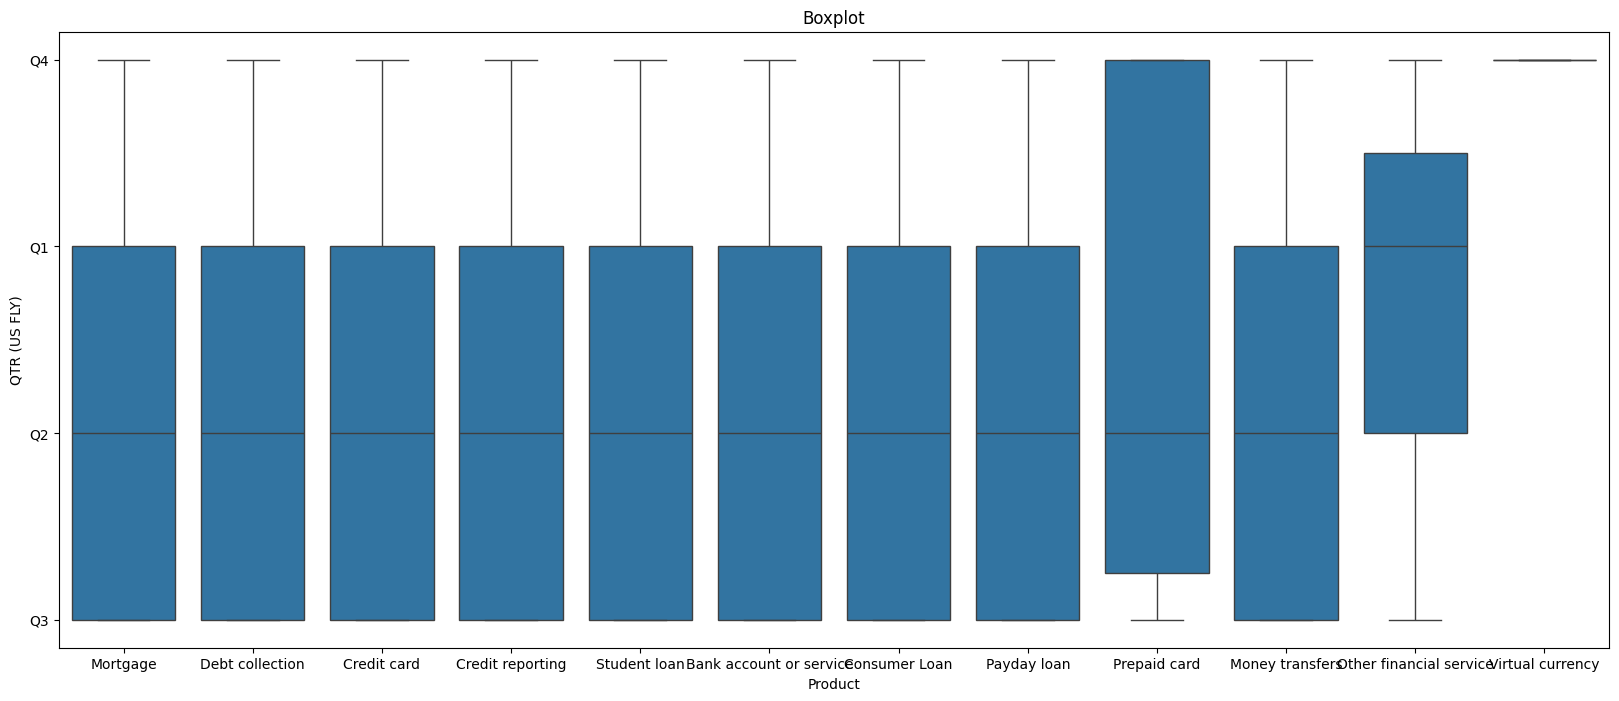

In [32]:
figure=plt.figure(figsize=(20,8))
sns.boxplot(x='Product',y='QTR (US FLY)',data=df)
plt.title("Boxplot")
plt.show()

# LINE CHART

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

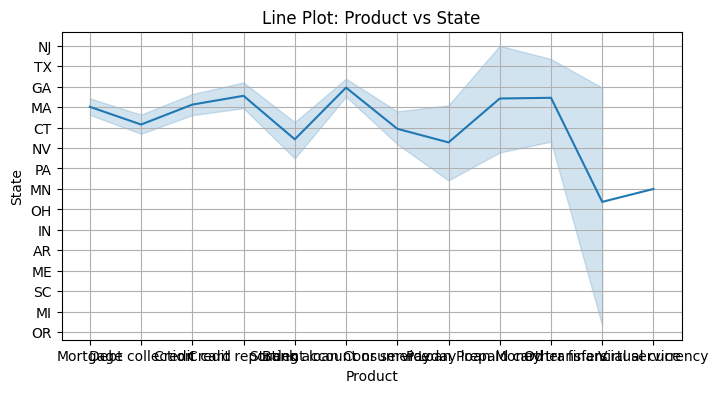

In [33]:
import matplotlib.pyplot as plt
df_clean= df[['Product', 'State']].dropna()
plt.figure(figsize=(8, 4))
sns.lineplot(x='Product', y='State', data=df_clean)
plt.title('Line Plot: Product vs State')
plt.xlabel('Product')
plt.ylabel('State')
plt.grid(True)
plt

# SCATTERPLOT

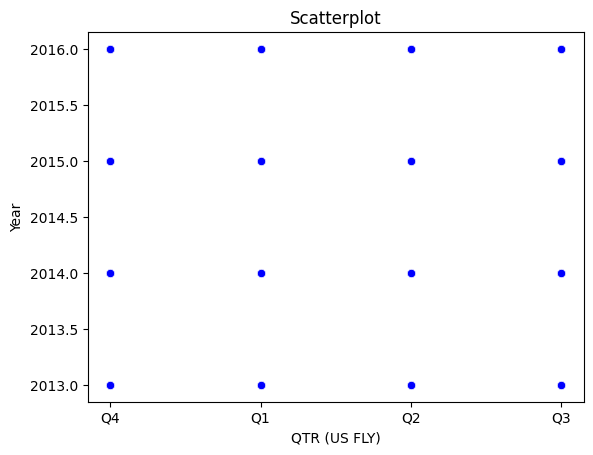

In [34]:
sns.scatterplot(x='QTR (US FLY)',y='Year',data=df,color='b')
plt.title("Scatterplot")
plt.show()

# HEATMAP

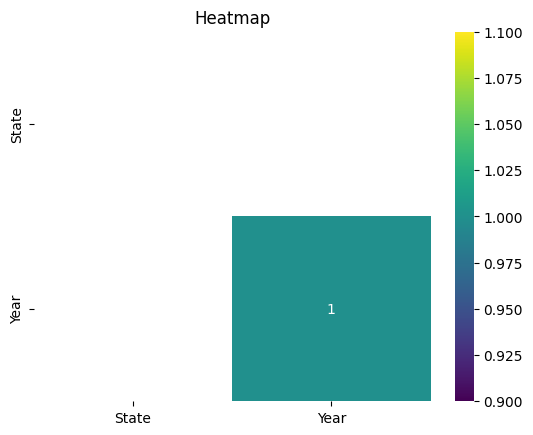

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/datatset_consumer_complaints.csv")

state_name_mapping={'tamil nadu':'tamil nadu','kerala':'kerala','goa':'goa','gujarat':'gujarat','assam':'assam','karnataka':'karnataka'}
df['State']=df['State'].map(state_name_mapping)
correlation_matrix=df[['State','Year']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.title("Heatmap")
plt.show()

# KDE PLOT

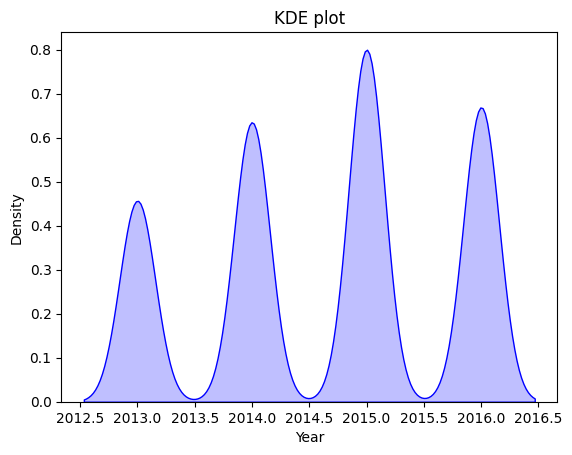

In [36]:
df['Year']=df['Year'].replace({'\$':'',',':''},regex=True).astype(float)
sns.kdeplot(df['Year'],fill=True,color='b')
plt.title("KDE plot")
plt.show()

# PIECHART

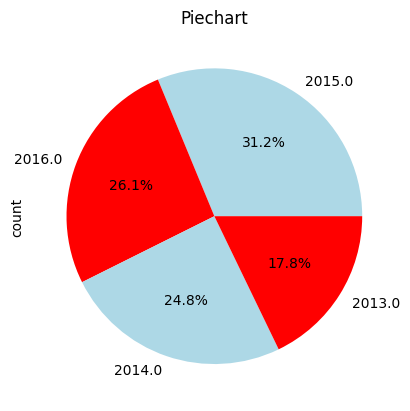

In [37]:
df['Year'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['lightblue','red'])
plt.title("Piechart")
plt.show()

In [38]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.skew()

,0
ID,-0.182957
Resolution time(in days),12.611181
Year,-0.202257


# SKEWNESS

In [39]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
numeric_df = df.select_dtypes(include=['number'])
skewed_cols = numeric_df.columns[numeric_df.skew().abs() > 1]
for col in skewed_cols:
    if col in df.columns:
        df[col] = np.log1p(df[col]) if (df[col] > 0).all() else PowerTransformer(method='yeo-johnson').fit_transform(df[[col]])

print("Skewness After Transformation:\n", df[skewed_cols].skew())

Skewness After Transformation:
 Resolution time(in days)    0.470295
dtype: float64


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [41]:
x=df.drop(columns='Year',axis=1)
y=df['Year']
categorical_features=x.select_dtypes(include=['object']).columns
numerical_features=x.select_dtypes(exclude=['object']).columns
categorical_transformer=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
numerical_transformer='passthrough'
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)
x_encoded=preprocessor.fit_transform(x)
x_encoded_df=pd.DataFrame(x_encoded,columns=preprocessor.get_feature_names_out())
selecter=SelectKBest(score_func=f_classif,k=4)
x_new=selecter.fit_transform(x_encoded_df,y)
selected_features=x_encoded_df.columns[selecter.get_support()]
feature_score=pd.DataFrame({'features':x_encoded_df.columns,'score':selecter.scores_}).sort_values(by='score',ascending=False)
feature_score
print("Selected features")
print(selected_features)
print("\nFeature scores")
print(feature_score)

Selected features
Index(['num__ ID', 'num__Resolution time(in days)',
       'cat__Issue_Repaying your loan', 'cat__QTR (US FLY)_Q4'],
      dtype='object')

Feature scores
                                               features         score
0                                              num__ ID  64864.748062
6594                               cat__QTR (US FLY)_Q4    331.685516
1                         num__Resolution time(in days)    185.160390
1131                      cat__Issue_Repaying your loan    130.155487
1150                             cat__Submitted via_Web     93.098596
...                                                 ...           ...
719                  cat__Company_Patenaude & Felix APC      0.055640
460   cat__Company_HCFS Health Care Financial Servic...      0.055640
1003                  cat__Company_Valley National Bank      0.055640
3857                            cat__state name_Georgia      0.021861
1145                                     cat__State_nan  

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [1145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded_df,y,test_size=0.2,random_state=42)

In [44]:
Ss=StandardScaler()
x_test_scaled=Ss.fit_transform(x_test)
x_train_scaled=Ss.fit_transform(x_train)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

# CLASSIFIERS

In [46]:
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'RFC':RandomForestClassifier()
}


In [ ]:
y_train_discrete = (y_train > y_train.mean()).astype(int)
y_test_discrete = (y_test > y_test.mean()).astype(int)
for name,clf in classifiers.items():
    clf.fit(x_train_scaled,y_train_discrete)
    y_pred=clf.predict(x_test_scaled)
    print(f"\n{name}Results:")
    print("Accuracy:",accuracy_score(y_test_discrete,y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_discrete,y_pred))
    print("\nClassification Report:")


Logistic RegressionResults:
Accuracy: 1.0

Confusion Matrix:
[[1058    0]
 [   0 1515]]

Classification Report:

Decision TreeResults:
Accuracy: 0.9957248348231637

Confusion Matrix:
[[1058    0]
 [  11 1504]]

Classification Report:
